# Glide inplace

When glide does not produce any good pose is this because it does not sample the correct pose, or is it that the correct pose does not fit in the binding pocket?

Here, are results of glide docking using the refine only mode, which should start from the correct pose and refine to a local minimum. This would hopefully produce a correct pose whereever it is possible with the given protein conformation.

However, there are some unanswered questions related to how effective this is. Namely there are cases where in place docking does not produce a pose, but normal docking does. This seems to discredit the assumption that inplace docking would have a high true positive rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = {} # (prot, grid) -> ligand ->  np.array(N, 2) (rmsds, gscores)
with open('../combind_sherlock/bpp_outputs/glide_performance_glide12.tsv') as fp:
    for line in fp:
        try:
            (protein, grid, ligand, rmsds, gscores, emodels,
             inplace_gscore, inplace_emodel, inplace_rmsd) = line.strip().split('\t')
            inplace_gscore = float(inplace_gscore)
            inplace_emodel = float(inplace_emodel)
            inplace_rmsd = float(inplace_rmsd)
            if inplace_rmsd > 2:
                inplace_gscore = float('inf')
                inplace_emodel = float('inf')
                
            rmsds = map(float, rmsds.split(','))
            gscores = map(float, gscores.split(','))
            emodels = map(float, emodels.split(','))
            assert len(rmsds) == len(gscores)
            key = (protein, grid)
            if key not in data: data[key] = {}
            assert ligand not in data[key]
            data[key][ligand] = (np.vstack([rmsds, gscores, emodels]),
                                 inplace_gscore, inplace_emodel, inplace_rmsd)
        except:
            print line.strip().split()[:3]

['BRAF', '1UWH', '3TV4_lig']
['BRAF', '1UWH', '4MNF_lig']
['BRAF', '1UWH', '4R5Y_lig']
['BRAF', '1UWH', '4YHT_lig']
['BRAF', '1UWH', '5C9C_lig']
['BRAF', '1UWH', '5CSW_lig']
['BRAF', '1UWH', '5CT7_lig']
['BRAF', '1UWH', '5FD2_lig']
['ERA', '1A52', '1L2I_lig']


In [3]:
print len(data)
print sum([len(v) for k, v in data.items()])
for count, key in sorted([(len(v), k) for k, v in data.items()]):
    print count, key[0]

36
653
2 5HT2B
2 M3
2 SIGMA1
2 TRPV1
3 GLUT1
5 MGLUR5
5 STRANSP
7 SMO
8 B2AR
9 DTRANSP
11 AR
12 B1AR
12 PLK1
13 MR
13 P24941
14 P03951
17 O60885
18 A2AR
18 GCR
24 P00489
24 Q16539
24 Q9Y233
27 ERA
27 P00749
28 BRAF
28 CHK1
29 CDK2
29 MEK1
30 JAK2
30 P00734
30 P00742
30 P00760
30 P07900
30 P18031
30 P56817
30 VITD


# Percentage with minimized pose

In [4]:
inplace = [(g, rmsds[0].min(), r)
           for (prot, grid), ligands in data.items()
           for ligand, (rmsds, g, e, r) in ligands.items()
           if ligand.split('_')[0] != grid]
inplace = np.array(inplace)
print inplace.shape
print sum(inplace[:, 0] != float('inf')) / float(len(inplace))

(619, 3)
0.780290791599


In [5]:
# What is going on in the 20 cases where we can't get a minimized pose?
print 'No inplace, no native', sum(inplace[inplace[:, 0] == float('inf'), 1] > 2)
print 'No inplace, native', sum(inplace[inplace[:, 0] == float('inf'), 1] <= 2)
print 'Inplace, no native', sum(inplace[inplace[:, 0] != float('inf'), 1] > 2)
print 'Inplace, native', sum(inplace[inplace[:, 0] != float('inf'), 1] <= 2)

No inplace, no native 109
No inplace, native 27
Inplace, no native 79
Inplace, native 404


In [6]:
for (prot, grid), ligands in data.items():
    for ligand, (rmsds, g, e, r) in ligands.items():
        if ligand.split('_')[0] != grid:
            if g == float('inf') and rmsds[0].min() < 1:
                print prot, grid, ligand
            if r > 3:
                print prot, grid, ligand, r

BRAF 1UWH 3C4C_lig
BRAF 1UWH 3C4C_lig inf
BRAF 1UWH 4EHG_lig inf
BRAF 1UWH 3TV6_lig inf
BRAF 1UWH 4MBJ_lig inf
BRAF 1UWH 3SKC_lig inf
BRAF 1UWH 4E26_lig inf
BRAF 1UWH 4E4X_lig inf
BRAF 1UWH 4EHE_lig inf
ERA 1A52 2G5O_lig inf
ERA 1A52 2AYR_lig inf
ERA 1A52 2IOK_lig inf
ERA 1A52 2IOG_lig inf
O60885 2YEL 4NUE_lig 3.09236342046
O60885 2YEL 4OGJ_lig 3.06107325809
P24941 1E1X 1PXP_lig inf
P24941 1E1X 2FVD_lig inf
P24941 1E1X 4BCO_lig inf
P24941 1E1X 2XMY_lig inf
P24941 1E1X 4BCN_lig inf
P24941 1E1X 2XNB_lig inf
P24941 1E1X 4BCP_lig inf
MGLUR5 4OO9 5CGD_lig inf
MGLUR5 4OO9 5CGC_lig inf
P07900 1YC1 2QG2_lig inf
P07900 1YC1 3QDD_lig inf
P07900 1YC1 3B25_lig inf
P07900 1YC1 1YET_lig inf
P07900 1YC1 3D0B_lig inf
P07900 1YC1 2YKI_lig inf
P18031 1BZC 1NO6_lig inf
P18031 1BZC 1ONZ_lig inf
P18031 1BZC 1NNY_lig inf
P18031 1BZC 1NL9_lig inf
P18031 1BZC 1ONY_lig inf
P18031 1BZC 2NT7_lig inf
P18031 1BZC 1NZ7_lig inf
P00489 1A8I 3G2L_lig inf
P00749 1C5X 4ZHM_lig inf
SMO 4JKV 4O9R_lig inf
SMO 4JKV 4QIN_lig

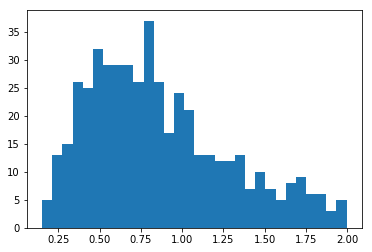

In [7]:
plt.hist(inplace[inplace[:, 0] != float('inf'), 2], bins = 30)
plt.show()

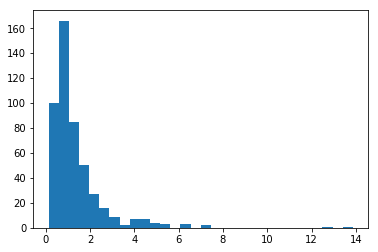

In [8]:
plt.hist(inplace[inplace[:, 0] != float('inf'), 1], bins = 30)
plt.show()

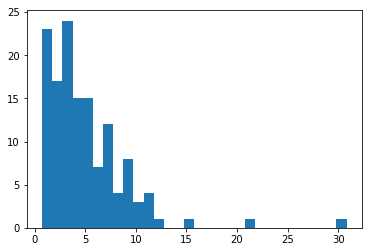

In [9]:
plt.hist(inplace[inplace[:, 0] == float('inf'), 1], bins = 30)
plt.show()

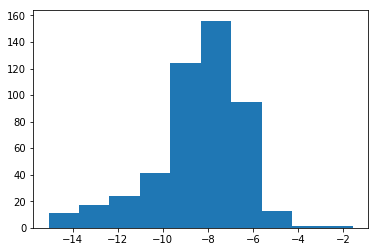

In [10]:
plt.hist(inplace[inplace[:, 0] != float('inf'), 0])
plt.show()